# Colaeta dos Dados 

Os dados utilizados foram retirados de uma base de dados do Kaggle, que pode ser encontrada neste link: https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018/data. Ela se Chama MLB Pitch data 2015-2019, e contém os dados de todos os arremessos dessas 5 Temporadas. Dentro da base de dados existiam mais dados acerca de rebatidas porém foi utilizado somente o dos arremessos

# Sobre os dados
|Campo|Descrição|
|:-|:-|
|px| Posiçao da bola no eixo x em relação ao homeplate |
|pz| Posiçao da bola no eixo y em relação ao homeplate |
|start_speed| Velocidade inicial|
|end_speed| Velocidade final|
|spin_rate| Rotações por minuto da bola|
|spin_dir| Direçao da Rotação da bola|
|break_angle| Ângulo da quebra da bola|
|break-lenght| Comprimento da quebra|
|break_y| Quebra no eixo y|
|ax| Aceleração do arremesso no eixo x|
|ay| Aceleração do arremesso no eixo y|
|az| Aceleração do arremesso no eixo z|
|sz_top| Distância entre o chão e o topo da zona de strike do rebatedor |
|sz_bot| Distância entre o chão e o final da zona de strike do rebatedor |
|type_confidenca| O peso no nó de saída do algoritmo de classificação correspondente ao tipo de pitch mais provável |
|vx0| Velocidade inicial do arremesso no eixo x |
|vy0| Velocidade inicial do arremesso no eixo y |
|vz0| Velocidade inicial do arremesso no eixo z |
|x| A localização horizontal do arremesso ao cruzar a home plate |
|x0| A localizacão horizontal inicial do arremesso |
|y| A localização vertical do arremesso ao cruzar a home plate |
|y0| a distância em pés da base onde o sistema PITCHf/x está configurado para medir os parâmetros iniciais. |
|z0| A altura inicial do arremesso|
|pfx_x|O movimento horizontal do arremesso entre o ponto inicial e a homeplate |
|pfx_z|O movimento vertical do arremesso entre o ponto inicial e a homeplate |
|nasty|Sem informação exata |
|zone| Se foi ou não dentro da zona de strike
|code| Ação da jogada |
|type| Ação da jogada|
|pitch_type| Tipo de Arremesso |
|event_num| Número de eventos |
|b_score| Número de caminhadas
|ab_id| Id do Rebatedor |
|b_count| Contagem de bolas|
|s_count| Contagem de strikes|
|outs| Contagem de foras|
|pitch_num| Número de arremessos|
|on_1b| Se chegou na primeira base|
|on_2b|Se chegou na segunda base|
|on_3b|Se chegou na terceira base|

**OBJETIVO:** Os Arremessos são um dos pontos centrais no baseball, o objetivo deste material é utilizar destes dados e realizar uma regressão, de uma forma a compreender como esses dados podem ajudar a entender o que mais ajuda a conseguir um strike, que é a variável resposta

In [1]:
import pandas as pd

In [2]:
#Carregando a base de dados
df_pitches = pd.read_csv('../input/mlb-pitch-data-20152018/pitches.csv')

In [3]:
df_pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [4]:
df_pitches.dtypes

px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code                object
type                object
pitch_type          object
event_num            int64
b_score            float64
ab_id              float64
b_count            float64
s_count            float64
outs               float64
pitch_num          float64
o

In [5]:
#Selecionando as variáveis
variaveis = [['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_lenght', 'break_y',
             'zone', 'pitch_type', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b']]

In [6]:
df_pitches1 = df_pitches[['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'break_y',
             'zone', 'pitch_type', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'ab_id']]

In [7]:
df_pitches1.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,zone,pitch_type,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,ab_id
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,3.0,FF,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.015000e+09
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,5.0,FF,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.015000e+09
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,1.0,FF,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.015000e+09
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,13.0,FF,0.0,2.0,0.0,4.0,0.0,0.0,0.0,2.015000e+09
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,13.0,CU,1.0,2.0,0.0,5.0,0.0,0.0,0.0,2.015000e+09


# Limpando os dados

In [8]:
df_pitches1.isnull().sum()

px              14189
pz              14189
start_speed     14114
end_speed       14114
spin_rate       14189
spin_dir        14189
break_angle     14189
break_length    14189
break_y         14189
zone            14189
pitch_type      14189
b_count             0
s_count             0
outs                0
pitch_num           0
on_1b               0
on_2b               0
on_3b               0
ab_id               0
dtype: int64

In [9]:
df_pitches1.dropna(inplace = True)

/tmp/ipykernel_19/1464123289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1.dropna(inplace = True)


In [10]:
df_pitches1.isnull().sum()

px              0
pz              0
start_speed     0
end_speed       0
spin_rate       0
spin_dir        0
break_angle     0
break_length    0
break_y         0
zone            0
pitch_type      0
b_count         0
s_count         0
outs            0
pitch_num       0
on_1b           0
on_2b           0
on_3b           0
ab_id           0
dtype: int64

# Criando Variáveis

In [11]:
#Número de Strikes (2.0) = 823809
df_pitches1.s_count.value_counts()

s_count
0.0    1157146
1.0     872010
2.0     823809
Name: count, dtype: int64

In [12]:
#Número de walks (3.0) = 232911
df_pitches1.b_count.value_counts()

b_count
0.0    1287164
1.0     851913
2.0     480964
3.0     232911
4.0         13
Name: count, dtype: int64

In [13]:
#Existia um outlier com valor 4, coisa que não existe
df_pitches1.drop(df_pitches1[df_pitches1['b_count'] == 4].index, inplace = True)


/tmp/ipykernel_19/2471829497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1.drop(df_pitches1[df_pitches1['b_count'] == 4].index, inplace = True)


In [14]:
#Fazendo uma coluna indicando quando se teve um strikeout
df_pitches1['strikeout'] = (df_pitches1['s_count'] == 2.0).astype(int)

/tmp/ipykernel_19/3402060700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1['strikeout'] = (df_pitches1['s_count'] == 2.0).astype(int)


In [15]:
#Fazendo uma coluna indicando quando se teve um walk
df_pitches1['walk'] = (df_pitches1['b_count'] == 3.0).astype(int)

/tmp/ipykernel_19/3852962727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1['walk'] = (df_pitches1['b_count'] == 3.0).astype(int)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vizualização dos Dados e Análise Exploratória

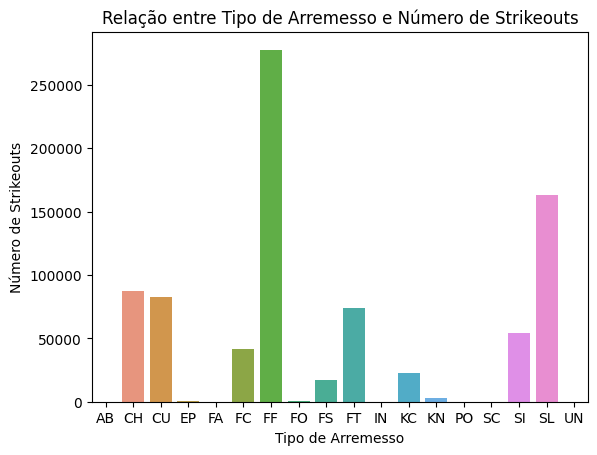

In [17]:
# Agrupando por tipo de arremesso e calculando a contagem de strikeouts
contagem_strikeouts = df_pitches1.groupby('pitch_type')['strikeout'].sum().reset_index()

# Crie um gráfico de dispersão
sns.barplot(x='pitch_type', y='strikeout', data=contagem_strikeouts)

# Adicione rótulos ao gráfico
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Número de Strikeouts')
plt.title('Relação entre Tipo de Arremesso e Número de Strikeouts')

plt.show()

In [18]:
df_pitches1.strikeout.value_counts()

strikeout
0    2029155
1     823797
Name: count, dtype: int64

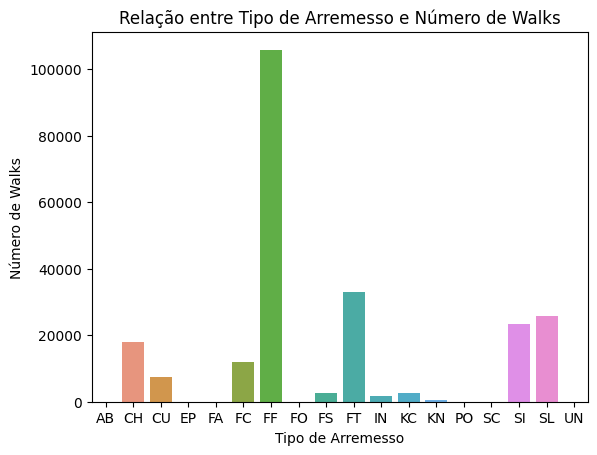

In [19]:
# Agrupando por tipo de arremesso e calculando a contagem de walks
contagem_walks = df_pitches1.groupby('pitch_type')['walk'].sum().reset_index()

# Crie um gráfico de dispersão
sns.barplot(x='pitch_type', y='walk', data=contagem_walks)

# Adicione rótulos ao gráfico
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Número de Walks')
plt.title('Relação entre Tipo de Arremesso e Número de Walks')

plt.show()

In [20]:
df_pitches1.walk.value_counts()

walk
0    2620041
1     232911
Name: count, dtype: int64

## Teste de variáveis para o modelo

In [21]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
df_treino, df_teste = train_test_split(df_pitches1, test_size=0.3, random_state=42)

In [23]:
# Testando as melhores variáveis que levam ao strikeout
y, x = patsy.dmatrices('strikeout ~ px + pz + start_speed + end_speed + spin_rate + spin_dir + break_angle + break_length + break_y + C(zone) + C(pitch_type) + b_count + s_count + outs + pitch_num + on_1b + on_2b + on_3b', data = df_treino)

In [24]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 1.392e+05
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:19:42   Log-Likelihood:             1.6446e+05
No. Observations:             1997066   AIC:                        -3.288e+05
Df Residuals:                 1997020   BIC:                        -3.282e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0954      0.146     -0.653      0.513      -0.381       0.191
C(zone)[T.2.0]         -0.0012      0.001     -1.024      0.306      -0.004       0.001
C(zone)[T.3.0]         -0.0047      0.001     -3.604      0.000      -0.007      -0.002
C(zone)[T.4.0]         -0.0052      0.001     -4.608      0.000      -0.007      -0.003
C(zone)[T.5.0]         -0.0054      0.001     -4.853      0.000      -0.008      -0.003
C(zone)[T.6.0]         -0.0099      0.001     -8.398      0.000      -0.012      -0.008
C(zone)[T.7.0]         -0.0079      0.001     -6.585      0.000      -0.010      -0.006
C(zone)[T.8.0]         -0.0062      0.001     -5.277      0.000      -0.009      -0.004
C(zone)[T.9.0]         -0.0100      0.001     -8.212      0.000      -0.012      -0.008
C(zone)[T.11.0]         0.0070      0.001      7.028      0.000       0.005       0.009
C(zone)[T.12.0]         0.0021      0.001      1.908      0.056   -5.86e-05       0.004
C(zone)[T.13.0]        -0.0050      0.001     -4.658      0.000      -0.007      -0.003
C(zone)[T.14.0]        -0.0056      0.001     -4.833      0.000      -0.008      -0.003
C(pitch_type)[T.CH]    -0.1929      0.111     -1.731      0.083      -0.411       0.025
C(pitch_type)[T.CU]    -0.1563      0.111     -1.403      0.161      -0.375       0.062
C(pitch_type)[T.EP]    -0.1568      0.112     -1.402      0.161      -0.376       0.062
C(pitch_type)[T.FA]    -0.2443      0.136     -1.790      0.073      -0.512       0.023
C(pitch_type)[T.FC]    -0.1820      0.111     -1.633      0.102      -0.400       0.036
C(pitch_type)[T.FF]    -0.1623      0.111     -1.456      0.145      -0.381       0.056
C(pitch_type)[T.FO]    -0.1652      0.112     -1.477      0.140      -0.384       0.054
C(pitch_type)[T.FS]    -0.1764      0.111     -1.583      0.114      -0.395       0.042
C(pitch_type)[T.FT]    -0.1757      0.111     -1.576      0.115      -0.394       0.043
C(pitch_type)[T.IN]    -0.0534      0.111     -0.479      0.632      -0.272       0.165
C(pitch_type)[T.KC]    -0.1658      0.111     -1.488      0.137      -0.384       0.053
C(pitch_type)[T.KN]    -0.1690      0.111     -1.516      0.130      -0.387       0.049
C(pitch_type)[T.PO]    -0.1683      0.112     -1.504      0.133      -0.388       0.051
C(pitch_type)[T.SC]    -0.1397      0.114     -1.224      0.221      -0.363       0.084
C(pitch_type)[T.SI]    -0.1721      0.111     -1.544      0.122      -0.391       0.046
C(pitch_type)[T.SL]    -0.1643      0.111     -1.474      0.140      -0.383       0.054
C(pitch_type)[T.UN]    -0.0619      0.117     -0.530      0.596      -0.291       0.167
px                      0.0033      0.000      9.379      0.000       0.003       0.004
pz                     -0.0008      0.000     -2.556      0.011      -0.001      -0.000
sta

In [25]:
# Retirando variáveis a partir do p-value
y, x = patsy.dmatrices('strikeout ~  pz + start_speed + end_speed + break_angle + break_length  + b_count + s_count + pitch_num', data = df_treino)

In [26]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 7.796e+05
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:19:43   Log-Likelihood:             1.6127e+05
No. Observations:             1997066   AIC:                        -3.225e+05
Df Residuals:                 1997057   BIC:                        -3.224e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3581      0.005    -69.007      0.000      -0.368      -0.348
pz               0.0041      0.000     22.614      0.000       0.004       0.004
start_speed      0.0023      0.000     12.685      0.000       0.002       0.003
end_speed       -0.0013      0.000     -6.584      0.000      -0.002      -0.001
break_angle  -7.428e-05   6.76e-06    -10.987      0.000   -8.75e-05    -6.1e-05
break_length     0.0022      0.000     20.826      0.000       0.002       0.002
b_count         -0.1160      0.000   -281.088      0.000      -0.117      -0.115
s_count          0.3348      0.000    723.226      0.000       0.334       0.336
pitch_num        0.1148      0.000    329.012      0.000       0.114       0.115
==============================================================================
Omnibus:                 76501486.245   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305227.051
Skew:                          -0.685   Prob(JB):                         0.00
Kurtosis:                       1.662   Cond. No.                     3.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
import numpy as np

In [28]:
# Retirando variáveis a partir do p-value
y, x = patsy.dmatrices('strikeout ~ pitch_type + pz + start_speed + end_speed + break_angle + break_length  + b_count + s_count + pitch_num', data = df_treino)

In [29]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 2.504e+05
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:19:52   Log-Likelihood:             1.6403e+05
No. Observations:             1997066   AIC:                        -3.280e+05
Df Residuals:                 1997040   BIC:                        -3.277e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1774      0.112     -1.590      0.112      -0.396       0.041
pitch_type[T.CH]    -0.1942      0.111     -1.743      0.081      -0.413       0.024
pitch_type[T.CU]    -0.1564      0.111     -1.403      0.161      -0.375       0.062
pitch_type[T.EP]    -0.1567      0.112     -1.401      0.161      -0.376       0.063
pitch_type[T.FA]    -0.2480      0.137     -1.817      0.069      -0.516       0.020
pitch_type[T.FC]    -0.1820      0.111     -1.633      0.103      -0.400       0.036
pitch_type[T.FF]    -0.1646      0.111     -1.476      0.140      -0.383       0.054
pitch_type[T.FO]    -0.1655      0.112     -1.479      0.139      -0.385       0.054
pitch_type[T.FS]    -0.1771      0.111     -1.589      0.112      -0.396       0.041
pitch_type[T.FT]    -0.1782      0.111     -1.599      0.110      -0.397       0.040
pitch_type[T.IN]    -0.0519      0.112     -0.465      0.642      -0.270       0.167
pitch_type[T.KC]    -0.1659      0.111     -1.488      0.137      -0.384       0.053
pitch_type[T.KN]    -0.1677      0.111     -1.505      0.132      -0.386       0.051
pitch_type[T.PO]    -0.1658      0.112     -1.481      0.139      -0.385       0.054
pitch_type[T.SC]    -0.1396      0.114     -1.222      0.222      -0.363       0.084
pitch_type[T.SI]    -0.1747      0.111     -1.567      0.117      -0.393       0.044
pitch_type[T.SL]    -0.1633      0.111     -1.465      0.143      -0.382       0.055
pitch_type[T.UN]    -0.0615      0.117     -0.526      0.599      -0.290       0.167
pz                   0.0021      0.000     11.298      0.000       0.002       0.002
start_speed          0.0021      0.000     11.287      0.000       0.002       0.003
end_speed           -0.0012      0.000     -5.817      0.000      -0.002      -0.001
break_angle      -4.602e-05   6.88e-06     -6.687      0.000   -5.95e-05   -3.25e-05
break_length         0.0017      0.000     11.547      0.000       0.001       0.002
b_count             -0.1159      0.000   -280.903      0.000      -0.117      -0.115
s_count              0.3348      0.000    722.762      0.000       0.334       0.336
pitch_num            0.1148      0.000    329.492      0.000       0.114       0.115
==============================================================================
Omnibus:                100777509.091   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           302586.560
Skew:                          -0.682   Prob(JB):                         0.00
Kurtosis:                       1.668   Cond. No.                     3.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05.

In [30]:
reg = smf.ols('strikeout ~ pitch_type + pz + start_speed + end_speed + break_angle + break_length  + b_count + s_count + pitch_num', data = df_treino).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 2.504e+05
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:20:01   Log-Likelihood:             1.6403e+05
No. Observations:             1997066   AIC:                        -3.280e+05
Df Residuals:                 1997040   BIC:                        -3.277e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1774      0.112     -1.590      0.112      -0.396       0.041
pitch_type[T.CH]    -0.1942      0.111     -1.743      0.081      -0.413       0.024
pitch_type[T.CU]    -0.1564      0.111     -1.403      0.161      -0.375       0.062
pitch_type[T.EP]    -0.1567      0.112     -1.401      0.161      -0.376       0.063
pitch_type[T.FA]    -0.2480      0.137     -1.817      0.069      -0.516       0.020
pitch_type[T.FC]    -0.1820      0.111     -1.633      0.103      -0.400       0.036
pitch_type[T.FF]    -0.1646      0.111     -1.476      0.140      -0.383       0.054
pitch_type[T.FO]    -0.1655      0.112     -1.479      0.139      -0.385       0.054
pitch_type[T.FS]    -0.1771      0.111     -1.589      0.112      -0.396       0.041
pitch_type[T.FT]    -0.1782      0.111     -1.599      0.110      -0.397       0.040
pitch_type[T.IN]    -0.0519      0.112     -0.465      0.642      -0.270       0.167
pitch_type[T.KC]    -0.1659      0.111     -1.488      0.137      -0.384       0.053
pitch_type[T.KN]    -0.1677      0.111     -1.505      0.132      -0.386       0.051
pitch_type[T.PO]    -0.1658      0.112     -1.481      0.139      -0.385       0.054
pitch_type[T.SC]    -0.1396      0.114     -1.222      0.222      -0.363       0.084
pitch_type[T.SI]    -0.1747      0.111     -1.567      0.117      -0.393       0.044
pitch_type[T.SL]    -0.1633      0.111     -1.465      0.143      -0.382       0.055
pitch_type[T.UN]    -0.0615      0.117     -0.526      0.599      -0.290       0.167
pz                   0.0021      0.000     11.298      0.000       0.002       0.002
start_speed          0.0021      0.000     11.287      0.000       0.002       0.003
end_speed           -0.0012      0.000     -5.817      0.000      -0.002      -0.001
break_angle      -4.602e-05   6.88e-06     -6.687      0.000   -5.95e-05   -3.25e-05
break_length         0.0017      0.000     11.547      0.000       0.001       0.002
b_count             -0.1159      0.000   -280.903      0.000      -0.117      -0.115
s_count              0.3348      0.000    722.762      0.000       0.334       0.336
pitch_num            0.1148      0.000    329.492      0.000       0.114       0.115
==============================================================================
Omnibus:                100777509.091   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           302586.560
Skew:                          -0.682   Prob(JB):                         0.00
Kurtosis:                       1.668   Cond. No.                     3.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05.

# Avaliando na base de Testes

In [31]:
#avaliando na base de teste.

y_pred = reg.predict(df_teste[['pz', 'start_speed', 'end_speed','break_angle', 'break_length',
              'pitch_type', 'b_count', 's_count', 'pitch_num'
]])

r2_ajustado = r2_score(df_teste['strikeout'], y_pred)
print(f'R-quadrado ajustado: {r2_ajustado:.2%}')

R-quadrado ajustado: -4.93%


# Conclusões

-  O R2 foi bastante alto se aproximando de 80%, porém durante as tentativas ão foi possível melhorar, apesar disso conclui-se que é um modelo prditivo que está bom e ainda pode melhorar
- Dito isto, somente foi utilizado uma parte do data-set original, então provavelemnte as outras partes do "quebra-cabeças" estão na parte que contém os rebatedores;
- Apesar disso, as variáveis escolhidas apresenaram um a certa influência dentro do modelo, precisando apenas de mais ajuda de outras variáveis ou de outros tipos de mudanças dentro delas mesmas.